In [5]:
import pandas as pd
import matplotlib as plt
from fbprophet import Prophet

In [6]:
data=pd.read_csv("./source-data/mexico/mexico_city_total_source_latest.csv")
data

,country,region,region_code,start_date,end_date,year,week,population,total_deaths
0,Mexico,Mexico City,MX-CMX,04/01/2016,10/01/2016,2016,1,8918653,1520.0
1,Mexico,Mexico City,MX-CMX,11/01/2016,17/01/2016,2016,2,8918653,1575.0
2,Mexico,Mexico City,MX-CMX,18/01/2016,24/01/2016,2016,3,8918653,1673.0
3,Mexico,Mexico City,MX-CMX,25/01/2016,31/01/2016,2016,4,8918653,1715.0
4,Mexico,Mexico City,MX-CMX,01/02/2016,07/02/2016,2016,5,8918653,1724.0
...,...,...,...,...,...,...,...,...,...
255,Mexico,Mexico City,MX-CMX,23/11/2020,29/11/2020,2020,48,8918653,NaN
256,Mexico,Mexico City,MX-CMX,30/11/2020,06/12/2020,2020,49,8918653,NaN
257,Mexico,Mexico City,MX-CMX,07/12/2020,13/12/2020,2020,50,8918653,NaN
258,Mexico,Mexico City,MX-CMX,14/12/2020,20/12/2020,2020,51,8918653,NaN


In [34]:
data.shape

(260, 9)

In [20]:
data.dtypes

country          object
region           object
region_code      object
start_date       object
end_date         object
year              int64
week              int64
population        int64
total_deaths    float64
dtype: object

In [22]:
data['total_deaths'].describe()

count     206.000000
mean     1590.126214
std       521.428978
min      1216.000000
25%      1353.250000
50%      1418.000000
75%      1575.000000
max      4313.000000
Name: total_deaths, dtype: float64

In [24]:
year_counts = data.groupby('year')['total_deaths'].sum()
print(year_counts)

year
2016    73957.0
2017    75646.0
2018    76972.0
2019    35237.0
2020    65754.0
Name: total_deaths, dtype: float64


Matplotlib is building the font cache; this may take a moment.


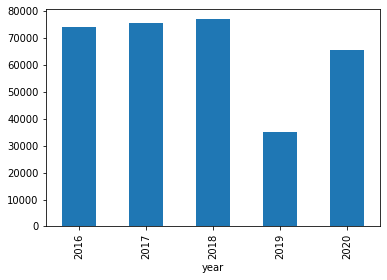

In [31]:
%matplotlib inline
year_counts.plot(kind='bar');

In [38]:
data.loc[data.year==2020]

,country,region,region_code,start_date,end_date,year,week,population,total_deaths
208,Mexico,Mexico City,MX-CMX,30/12/2019,05/01/2020,2020,1,8918653,NaN
209,Mexico,Mexico City,MX-CMX,06/01/2020,12/01/2020,2020,2,8918653,NaN
210,Mexico,Mexico City,MX-CMX,13/01/2020,19/01/2020,2020,3,8918653,NaN
211,Mexico,Mexico City,MX-CMX,20/01/2020,26/01/2020,2020,4,8918653,NaN
212,Mexico,Mexico City,MX-CMX,27/01/2020,02/02/2020,2020,5,8918653,NaN
213,Mexico,Mexico City,MX-CMX,03/02/2020,09/02/2020,2020,6,8918653,NaN
214,Mexico,Mexico City,MX-CMX,10/02/2020,16/02/2020,2020,7,8918653,NaN
215,Mexico,Mexico City,MX-CMX,17/02/2020,23/02/2020,2020,8,8918653,NaN
216,Mexico,Mexico City,MX-CMX,24/02/2020,01/03/2020,2020,9,8918653,NaN
217,Mexico,Mexico City,MX-CMX,02/03/2020,08/03/2020,2020,10,8918653,1430.0


In [46]:
data.loc[(data.year == 2020) & (data.total_deaths >= 1000)]

,country,region,region_code,start_date,end_date,year,week,population,total_deaths
217,Mexico,Mexico City,MX-CMX,02/03/2020,08/03/2020,2020,10,8918653,1430.0
218,Mexico,Mexico City,MX-CMX,09/03/2020,15/03/2020,2020,11,8918653,1550.0
219,Mexico,Mexico City,MX-CMX,16/03/2020,22/03/2020,2020,12,8918653,1407.0
220,Mexico,Mexico City,MX-CMX,23/03/2020,29/03/2020,2020,13,8918653,1499.0
221,Mexico,Mexico City,MX-CMX,30/03/2020,05/04/2020,2020,14,8918653,1491.0
222,Mexico,Mexico City,MX-CMX,06/04/2020,12/04/2020,2020,15,8918653,1624.0
223,Mexico,Mexico City,MX-CMX,13/04/2020,19/04/2020,2020,16,8918653,1828.0
224,Mexico,Mexico City,MX-CMX,20/04/2020,26/04/2020,2020,17,8918653,2475.0
225,Mexico,Mexico City,MX-CMX,27/04/2020,03/05/2020,2020,18,8918653,3508.0
226,Mexico,Mexico City,MX-CMX,04/05/2020,10/05/2020,2020,19,8918653,4127.0


In [47]:
data.loc[data.total_deaths.notnull()]

,country,region,region_code,start_date,end_date,year,week,population,total_deaths
0,Mexico,Mexico City,MX-CMX,04/01/2016,10/01/2016,2016,1,8918653,1520.0
1,Mexico,Mexico City,MX-CMX,11/01/2016,17/01/2016,2016,2,8918653,1575.0
2,Mexico,Mexico City,MX-CMX,18/01/2016,24/01/2016,2016,3,8918653,1673.0
3,Mexico,Mexico City,MX-CMX,25/01/2016,31/01/2016,2016,4,8918653,1715.0
4,Mexico,Mexico City,MX-CMX,01/02/2016,07/02/2016,2016,5,8918653,1724.0
...,...,...,...,...,...,...,...,...,...
237,Mexico,Mexico City,MX-CMX,20/07/2020,26/07/2020,2020,30,8918653,2214.0
238,Mexico,Mexico City,MX-CMX,27/07/2020,02/08/2020,2020,31,8918653,2269.0
239,Mexico,Mexico City,MX-CMX,03/08/2020,09/08/2020,2020,32,8918653,2337.0
240,Mexico,Mexico City,MX-CMX,10/08/2020,16/08/2020,2020,33,8918653,2338.0


In [16]:
new_data=data.iloc[:, [4, 8]]
new_data.columns=['ds', 'y' ]
new_data

,ds,y
0,10/01/2016,1520.0
1,17/01/2016,1575.0
2,24/01/2016,1673.0
3,31/01/2016,1715.0
4,07/02/2016,1724.0
...,...,...
255,29/11/2020,NaN
256,06/12/2020,NaN
257,13/12/2020,NaN
258,20/12/2020,NaN


In [17]:
m = Prophet()
m.fit(new_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future = m.make_future_dataframe(periods=400)
future

,ds
0,2016-01-05
1,2016-01-17
2,2016-01-24
3,2016-01-31
4,2016-02-10
...,...
655,2022-01-27
656,2022-01-28
657,2022-01-29
658,2022-01-30


In [21]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-05,1486.957602,1027.075884,1930.380794
1,2016-01-17,1575.592605,1156.200967,2017.444948
2,2016-01-24,1598.922170,1162.259285,2081.515633
3,2016-01-31,1557.734748,1153.449488,2034.205328
4,2016-02-10,1493.448538,1035.417239,1922.996296
...,...,...,...,...
655,2022-01-27,3747.059646,3265.047653,4238.322138
656,2022-01-28,3574.344753,3145.627285,4028.222247
657,2022-01-29,3813.129692,3342.825989,4288.983790
658,2022-01-30,3782.774582,3370.129282,4235.117660


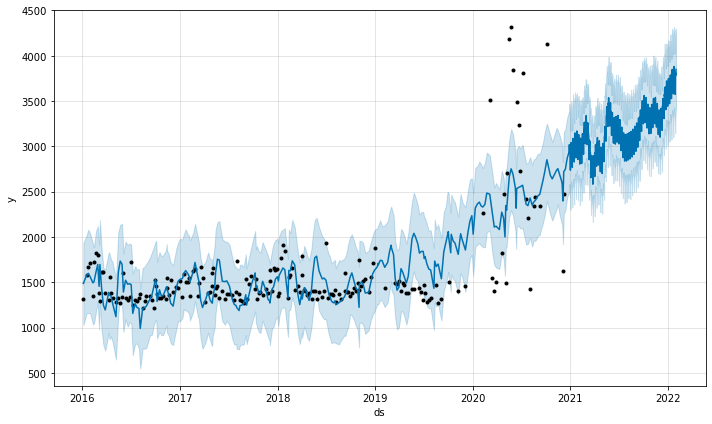

In [22]:
fig1 = m.plot(forecast)

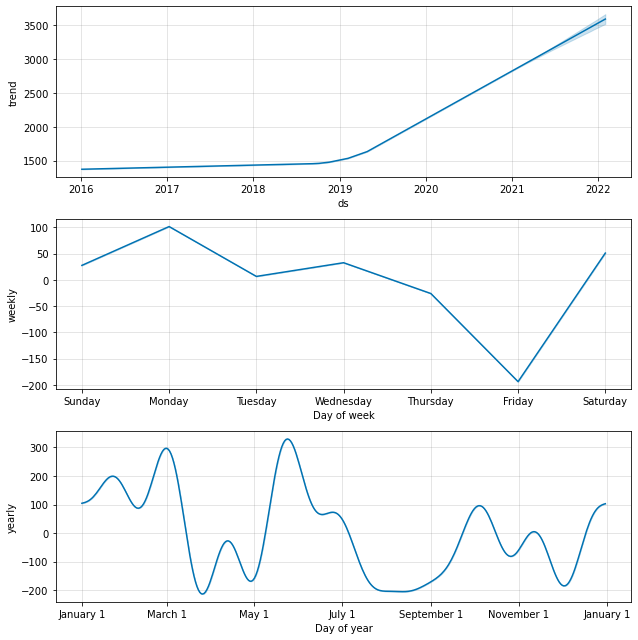

In [23]:
fig2 = m.plot_components(forecast)